<a href="https://colab.research.google.com/github/Dev-LuisVasquez/MineriaAUS/blob/main/eva3final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objetivo**

Saber en que ciudad llueve más y por qué, para posteriormente saber si va a llover el día de mañana en ella.



In [ ]:
#Librerías a utilizar
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
#Importar Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Leer DataFrame
aus = pd.read_csv("/content/drive/MyDrive/Mineria Datos/ET/weatherAUS.csv")
aus

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


# Entendimiento del Negocio

> La idea es de realizar este trabajo es para tener una percepcion y buscar patrones dentro del DataSet para predecir las condiciones climaticas en australia a traves de diversos algoritmmos y erramientas que se nos facilito.

> El objetivo final de llevar acabo este proceso es crear un algoritmo final que pueda predecir si el dia de mañana llovera dentro de las ciudades donde mas llueve.

> estos datos a nivel logico estan representados como variables cualitativas, por ende se establecera modelos de entrenamiento de regresion.


# **Ánalisis Exploratorio**

**Descripción del Dataframe**

In [ ]:
#Descripción del DataFrame
aus.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


Con esta acción obtendremos algunas características de las columnas del dataframe que si necesitamos podremos utilizar más adelante. Obtenemos la cantidad de datos, el promedio, desviación estándar y cuartiles desde el mínimo al máximo.

**Tipos de datos**

In [ ]:
#Tipos de datos
aus.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

Obtenemos los tipos de datos que más adelante nos van a servir en caso de que haya que modificar alguno para poder trabajar de manera más comoda en nuestro futuro modelo.

**Tamaño del DataFrame**

In [ ]:
#Tamaño del dataframe.
print(f"El data frame tiene {aus.shape[0]} filas y {aus.shape[1]} columnas")

El data frame tiene 142193 filas y 24 columnas


**Missing Values**

A continuación, veremos la cantida de nulos que existen por columnas.

In [ ]:
print("El total de missing values por columnas es: ")
aus.isnull().sum()

El total de missing values por columnas es: 


Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

En un futuro deberemos trabajar en los missing values de dichas columnas que tienen directa relación con la lluvia, con la intención de poder trabajar más limpiamente con nuestro futuro modelo y lograr una mayor precisión. En este caso, la que tienen mayor número de nulos a trabajar son 'Evaporation' y 'Sunshine'.

**Primeros 20 registros de ciudades donde más ha llovido**

In [ ]:
lluvia = aus.sort_values("Rainfall", ascending=False)
lluvia.head(20)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
9236,2009-11-07,CoffsHarbour,17.4,23.1,371.0,NaN,3.5,NaN,NaN,SW,...,81.0,1026.6,1025.9,8.0,5.0,18.6,22.0,Yes,4.8,Yes
136881,2011-02-16,Darwin,22.1,25.6,367.6,NaN,0.0,WSW,83.0,SSE,...,98.0,996.3,996.0,8.0,8.0,24.3,23.5,Yes,184.6,Yes
84897,2009-01-12,Cairns,22.3,27.4,278.4,NaN,0.0,NW,59.0,SSE,...,98.0,1003.5,999.6,8.0,8.0,24.7,25.3,Yes,140.2,Yes
85650,2011-02-04,Cairns,22.9,29.9,268.6,NaN,2.0,ENE,37.0,ENE,...,84.0,1011.1,1009.3,6.0,8.0,29.8,28.0,Yes,13.2,Yes
87022,2015-02-08,Cairns,23.8,31.0,247.2,NaN,2.0,E,44.0,SSE,...,74.0,1014.2,1011.4,8.0,8.0,25.3,30.0,Yes,85.4,Yes
16920,2015-04-23,Newcastle,NaN,21.7,240.0,NaN,NaN,NaN,NaN,NW,...,62.0,NaN,NaN,6.0,6.0,17.5,21.0,Yes,0.4,No
90887,2009-02-03,Townsville,22.8,25.4,236.8,NaN,0.0,ESE,48.0,ESE,...,95.0,1003.8,1000.6,8.0,8.0,23.8,25.0,Yes,93.4,Yes
40862,2016-01-06,Williamtown,18.5,19.9,225.0,NaN,0.0,S,80.0,SSW,...,90.0,1008.5,1008.8,8.0,8.0,19.2,19.4,Yes,37.4,Yes
11494,2016-06-05,CoffsHarbour,14.6,19.2,219.6,NaN,NaN,WSW,70.0,WNW,...,83.0,998.5,993.7,8.0,8.0,16.5,18.0,Yes,0.1,No
17174,2016-01-06,Newcastle,15.5,NaN,216.3,NaN,NaN,NaN,NaN,SE,...,NaN,NaN,NaN,8.0,NaN,18.8,NaN,Yes,25.4,Yes


Con esto logramos obtener las tres primeras ciudades donde más llueve en Australia, las cuales son:

1.  **Cairns**: cinco registros, sumando un total de 1183.4 mm
2.  **CoffsHarbour**: cuatro registros, sumando un total de 988.1 mm
3.  **Darwin**: tres registros, sumando un total de 762.8 mm

Por lo cual, con la ciudad que más llueve y con la que trabajaremos es Cairns.


## **Ciudad de Cairns**

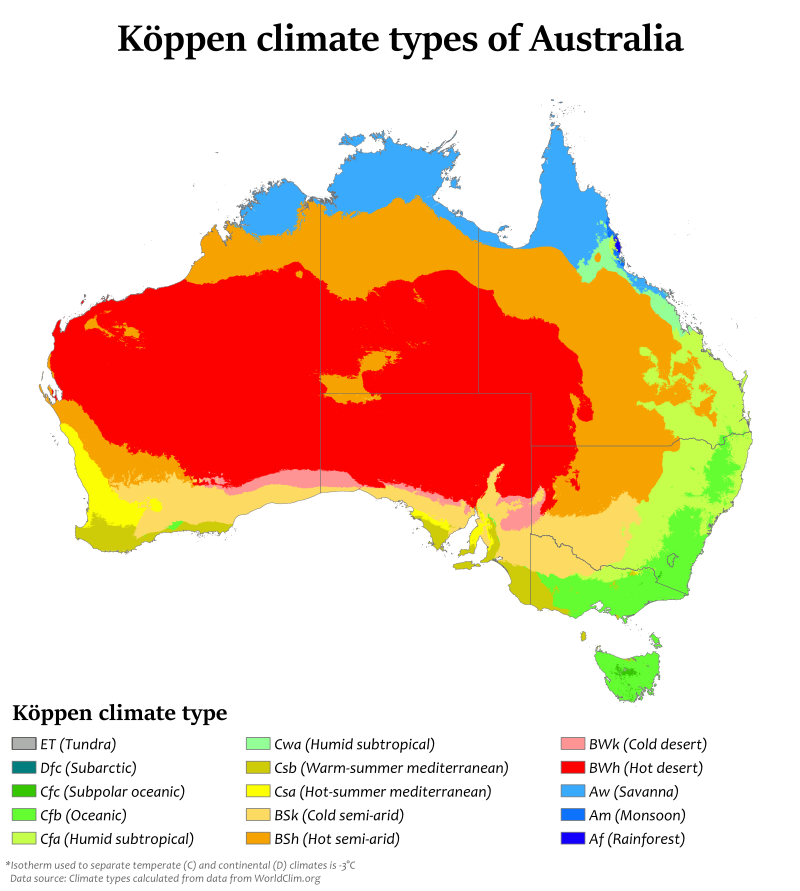

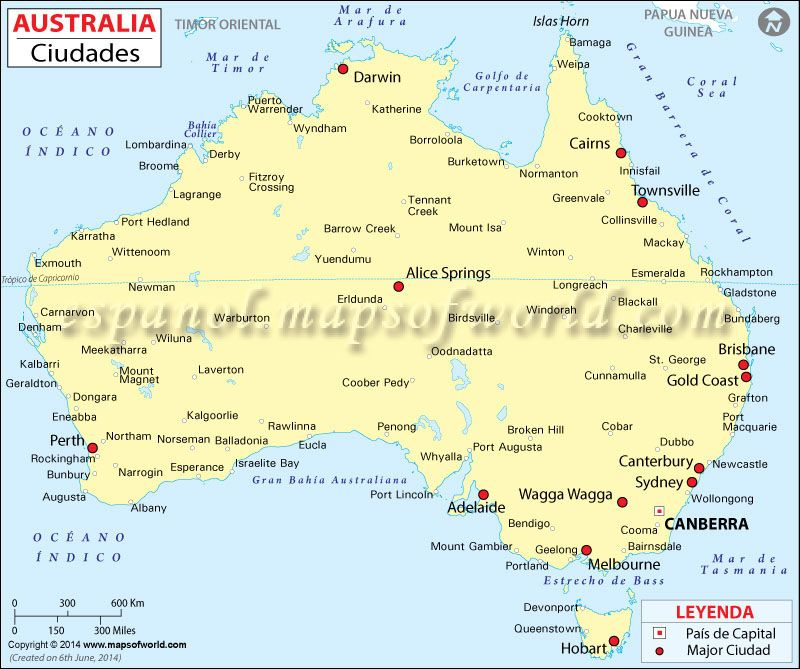

Primero que todo debemos saber que esta ciudad tiene un clima tropical mónzonico. Hay una temporada de lluvias con monzones tropicales que se extiende desde noviembre hasta mayo, con una estación relativamente seca de Junio a Octubre, aunque las lluvias son frecuentes para la mayor parte de este período. También esta ciudad está cerca de la costa por lo cual existe una mayor presión atmosferica que tiene directa relación con el fenomeno meteologico de la lluvia. Por otra parte, como es una ciudad tropical tiene un ambiente cálido debido a la luz del sol brillando, haciendo que el aire caliente suba y la presión baje.

**Fuentes:**   

*   https://es.wikipedia.org/wiki/Cairns#Clima 
*   https://gostudyaus.es/australia/donde-en-australia/cairns/



               

**Filtro Ciudad Cairns**

In [ ]:
#Realizaremos un filtro de la ciudad Cairns
FiltroC = aus[
    (aus['Location'].str.contains('Cairns') == True)]
FiltroC

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
84855,2008-12-01,Cairns,25.2,32.3,0.4,4.0,6.4,NE,31.0,E,...,66.0,1011.3,1008.1,5.0,7.0,31.2,30.7,No,8.4,Yes
84856,2008-12-02,Cairns,24.2,32.3,8.4,6.6,5.3,NE,35.0,S,...,62.0,1011.9,1008.0,7.0,7.0,29.0,31.1,Yes,0.6,No
84857,2008-12-03,Cairns,23.9,32.8,0.6,5.6,11.3,SSE,31.0,SSE,...,42.0,1012.2,1009.9,7.0,5.0,29.1,31.6,No,0.0,No
84858,2008-12-04,Cairns,22.2,33.6,0.0,9.6,12.3,SE,39.0,SSE,...,31.0,1013.3,1010.9,2.0,1.0,29.6,32.5,No,0.0,No
84859,2008-12-05,Cairns,23.2,33.5,0.0,11.6,11.8,SE,43.0,SSE,...,56.0,1013.8,1011.0,4.0,2.0,29.7,32.2,No,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87838,2017-06-21,Cairns,19.9,26.1,0.4,NaN,NaN,SE,48.0,S,...,78.0,1019.3,1016.3,8.0,8.0,20.8,23.4,No,0.2,No
87839,2017-06-22,Cairns,19.7,27.4,0.2,NaN,NaN,SE,46.0,SSE,...,61.0,1020.0,1016.7,NaN,8.0,23.0,25.2,No,1.0,No
87840,2017-06-23,Cairns,19.7,27.3,1.0,NaN,NaN,SE,39.0,S,...,55.0,1018.9,1015.3,8.0,8.0,21.2,25.7,No,1.2,Yes
87841,2017-06-24,Cairns,19.3,25.6,1.2,NaN,NaN,E,41.0,S,...,81.0,1016.2,1014.6,5.0,8.0,21.5,22.1,Yes,5.2,Yes


Con este filtro nos centraremos solo en registro que han habido a lo largo de los años en la ciudad de Cairns ya que trabajaremos con ella. Le tomaremos vital atención a los factores que pensamos que están directamente involucrados en la posibilidad de lluvia, los cuales son: Humedad, Evaporación, Presión, Número de horas de sol y Temperatura

##**Promedios**

In [ ]:
print('PROMEDIOS CIUDAD DE CAIRNS')
#Humedad
print('-------------------------------------------------------------------------------------------------')
print('Humedad:')
PH = FiltroC['Humidity3pm'].mean()
PH9 = FiltroC['Humidity9am'].mean()
print('El promedio de la humedad a las 3pm en la ciudad de Cairns es de: ', PH)
print('El promedio de la humedad a las 9am en la ciudad de Cairns es de: ', PH9)
print('-------------------------------------------------------------------------------------------------')
#Evaporación
print('Evaporación:')
EV = FiltroC['Evaporation'].mean()
print('El promedio de la evaporación en la ciudad de Cairns es de: ', EV)
print('-------------------------------------------------------------------------------------------------')
#Presión
print('Presión Atmosferica:')
PA9 = FiltroC['Pressure9am'].mean()
PA3P = FiltroC['Pressure3pm'].mean()
print('El promedio de la presión atmosferica en la ciudad de Cairns a las 9am es de: ', PA9)
print('El promedio de la presión atmosferica en la ciudad de Cairns a las 3pm es de: ', PA3P)
print('-------------------------------------------------------------------------------------------------')
#Horas de sol
print('Horas de sol:')
HS = FiltroC['Sunshine'].mean()
print('El promedio de las horas de sol en la ciudad de Cairns es de: ', HS)
print('El promedio de la presión atmosferica en la ciudad de Cairns a las 3pm es de: ', PA3P)
print('-------------------------------------------------------------------------------------------------')
#Temperatura
print('Temperatura:') 
T9 = FiltroC['Temp9am'].mean()
T3 = FiltroC['Temp3pm'].mean()
print('La temperatura promedio a las 9am en la ciudad de Cairns es de: ', T9)
print('La temperatura promedio a las 3pm en la ciudad de Cairns es de: ', T3)
print('-------------------------------------------------------------------------------------------------')


PROMEDIOS CIUDAD DE CAIRNS
-------------------------------------------------------------------------------------------------
Humedad:
El promedio de la humedad a las 3pm en la ciudad de Cairns es de:  61.67737617135207
El promedio de la humedad a las 9am en la ciudad de Cairns es de:  69.90227576974564
-------------------------------------------------------------------------------------------------
Evaporación:
El promedio de la evaporación en la ciudad de Cairns es de:  6.211975821684926
-------------------------------------------------------------------------------------------------
Presión Atmosferica:
El promedio de la presión atmosferica en la ciudad de Cairns a las 9am es de:  1014.1542838018742
El promedio de la presión atmosferica en la ciudad de Cairns a las 3pm es de:  1011.1034471218206
-------------------------------------------------------------------------------------------------
Horas de sol:
El promedio de las horas de sol en la ciudad de Cairns es de:  7.57599531615925

Con esto podemos obtener los promedios de las características meteorologicas principales que influyen en la lluvia, los cuales son muy importantes porque nos aporta en obtener un número tangible promediado entre todos los datos existentes en las columnas.

## **Mínimos y Máximos**

Al igual que en los promedios, utilizaremos las mismas características meteorologicas.

In [ ]:
print('MÍNIMOS Y MÁXIMOS CIUDAD DE CAIRNS')
print('-------------------------------------------------------------------------------------------------')
#Humedad
print('Humedad: ')
HMAX = FiltroC['Humidity9am'].max()
HMIN = FiltroC['Humidity9am'].min()
HMAX3 = FiltroC['Humidity3pm'].max()
HMIN3 = FiltroC['Humidity3pm'].min()
print('La humedad máxima a las 9am en la ciudad de Cairns es de: ', HMAX)
print('La humedad mínima a las 9am en la ciudad de Cairns es de: ', HMIN)
print('La humedad máxima a las 3pm en la ciudad de Cairns es de: ', HMAX3)
print('La humedad mínima a las 3pm en la ciudad de Cairns es de: ', HMIN3)
print('-------------------------------------------------------------------------------------------------')
#Evaporación
print('Evaporación: ')
EVMAX = FiltroC['Evaporation'].max()
EVMIN = FiltroC['Evaporation'].min()
print('La evaporación máxima en la ciudad de Cairns es de: ', EVMAX)
print('La evaporación mínima en la ciudad de Cairns es de: ', EVMIN)
print('-------------------------------------------------------------------------------------------------')
#Presión Atmosferica
print('Presión Atmosferica: ')
PA9 = FiltroC['Pressure9am'].max()
PA9M = FiltroC['Pressure9am'].min()
PA3 = FiltroC['Pressure3pm'].max()
PA3M = FiltroC['Pressure3pm'].min()
print('La presión atmosferica máxima a las 9am en la ciudad de Cairns es de: ', PA9)
print('La presión atmosferica mínima a las 9am en la ciudad de Cairns es de: ', PA9M)
print('La presión atmosferica máxima a las 3pm en la ciudad de Cairns es de: ', PA3)
print('La presión atmosferica mínima a las 3pm en la ciudad de Cairns es de: ', PA3M)
print('-------------------------------------------------------------------------------------------------')
print('Horas de sol: ')
HSMA = FiltroC['Sunshine'].max()
HSMI = FiltroC['Sunshine'].min()
print('Las máximas horas de sol que han habido en la ciudad de Cairns es de: ', HSMA)
print('Las mínimas horas de sol que han habido en la ciudad de Cairns es de: ', HSMI)
print('-------------------------------------------------------------------------------------------------')
print('Temperatura: ')
TMA9 = FiltroC['Temp9am'].max()
TMI9 = FiltroC['Temp9am'].min()
TMA3 = FiltroC['Temp3pm'].max()
TMI3 = FiltroC['Temp3pm'].min()
print('La temperatura máxima a las 9am en la ciudad de Cairns es de: ', TMA9)
print('La temperatura mínima a las 9am en la ciudad de Cairns es de: ', TMI9)
print('La temperatura máxima a las 3pm en la ciudad de Cairns es de: ', TMA3)
print('La temperatura mínima a las 3pm en la ciudad de Cairns es de: ', TMI3)
print('-------------------------------------------------------------------------------------------------')


MÍNIMOS Y MÁXIMOS CIUDAD DE CAIRNS
-------------------------------------------------------------------------------------------------
Humedad: 
La humedad máxima a las 9am en la ciudad de Cairns es de:  100.0
La humedad mínima a las 9am en la ciudad de Cairns es de:  24.0
La humedad máxima a las 3pm en la ciudad de Cairns es de:  100.0
La humedad mínima a las 3pm en la ciudad de Cairns es de:  14.0
-------------------------------------------------------------------------------------------------
Evaporación: 
La evaporación máxima en la ciudad de Cairns es de:  44.4
La evaporación mínima en la ciudad de Cairns es de:  0.2
-------------------------------------------------------------------------------------------------
Presión Atmosferica: 
La presión atmosferica máxima a las 9am en la ciudad de Cairns es de:  1024.2
La presión atmosferica mínima a las 9am en la ciudad de Cairns es de:  994.4
La presión atmosferica máxima a las 3pm en la ciudad de Cairns es de:  1021.9
La presión atmosfer

## **Filtro ciudades CoffsHarbour y Darwin**

Primero que todo haremos un filtro para comparar las condiciones meteorologicas con CoffsHarbour y Darwin



In [ ]:
#Realizaremos un filtro de la ciudad CoffsHarbour
FiltroCO = aus[
    (aus['Location'].str.contains('CoffsHarbour') == True)]
FiltroCO

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
8927,2009-01-01,CoffsHarbour,16.1,31.4,0.0,7.4,11.4,NNE,54.0,N,...,58.0,1005.9,1002.3,1.0,5.0,26.5,28.4,No,0.0,No
8928,2009-01-02,CoffsHarbour,22.8,24.7,0.0,8.0,0.2,SSW,56.0,SSW,...,67.0,1010.9,1011.4,7.0,7.0,23.4,24.4,No,4.6,Yes
8929,2009-01-03,CoffsHarbour,20.0,24.1,4.6,3.4,0.2,SE,35.0,SE,...,59.0,1019.3,1018.8,8.0,7.0,21.7,23.7,Yes,0.8,No
8930,2009-01-04,CoffsHarbour,14.8,25.0,0.8,3.0,12.6,E,24.0,SSE,...,45.0,1019.5,1017.0,5.0,2.0,22.5,24.8,No,0.0,No
8931,2009-01-05,CoffsHarbour,15.5,27.3,0.0,6.6,13.1,NE,41.0,NW,...,62.0,1015.7,1012.7,1.0,6.0,24.6,26.1,No,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11875,2017-06-21,CoffsHarbour,14.5,21.4,0.0,NaN,NaN,S,39.0,WSW,...,59.0,1023.8,1022.6,NaN,7.0,17.6,20.2,No,0.0,No
11876,2017-06-22,CoffsHarbour,14.1,21.4,0.0,NaN,NaN,S,30.0,WSW,...,58.0,1026.3,1023.4,1.0,NaN,18.5,20.4,No,0.0,No
11877,2017-06-23,CoffsHarbour,8.3,20.0,0.0,NaN,NaN,SSE,20.0,NNW,...,62.0,1022.7,1017.6,NaN,NaN,15.1,19.5,No,0.0,No
11878,2017-06-24,CoffsHarbour,10.9,20.6,0.0,NaN,NaN,SW,26.0,SW,...,51.0,1017.8,1015.7,7.0,1.0,16.4,20.0,No,0.0,No


In [ ]:
FiltroD = aus[
    (aus['Location'].str.contains('Darwin') == True)]
FiltroD

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
135921,2008-07-01,Darwin,20.0,33.1,0.0,4.4,11.0,E,41.0,ENE,...,32.0,1016.0,1012.1,1.0,2.0,25.4,32.3,No,0.0,No
135922,2008-07-02,Darwin,19.4,32.4,0.0,6.0,10.4,ENE,50.0,SE,...,17.0,1016.8,1012.4,1.0,1.0,24.3,31.9,No,0.0,No
135923,2008-07-03,Darwin,18.2,31.8,0.0,8.0,11.0,E,46.0,ESE,...,24.0,1017.2,1013.0,0.0,1.0,24.3,31.2,No,0.0,No
135924,2008-07-04,Darwin,17.3,30.7,0.0,7.0,10.4,E,44.0,SE,...,16.0,1017.3,1013.6,2.0,6.0,21.3,29.8,No,0.0,No
135925,2008-07-05,Darwin,15.5,30.8,0.0,7.0,10.8,ESE,46.0,E,...,16.0,1016.3,1012.6,1.0,1.0,22.2,29.6,No,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139108,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,0.0,No
139109,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,0.0,No
139110,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,0.0,No
139111,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,0.0,No


A continuación haremos gráficos comparativos que confirman que la ciudad de Cairns es donde más llueve en Australia.

##**Gráficos**

Text(0.5, 1.0, 'Cantidad de días con lluvia en Darwin')

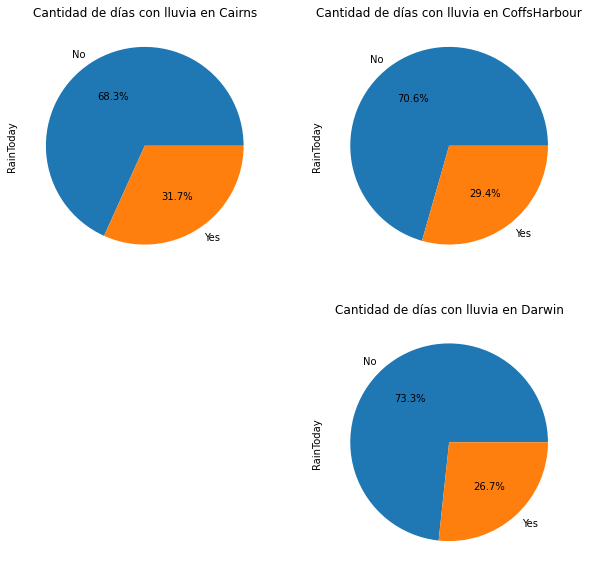

In [ ]:
#Gráfico de torta Cairns, CoffsHarbour y Darwin
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
DLC = FiltroC.RainToday.value_counts()
DLC.plot.pie(autopct='%1.1f%%')
plt.title('Cantidad de días con lluvia en Cairns')


plt.subplot(2,2,2)
DLCO = FiltroCO.RainToday.value_counts()
DLCO.plot.pie(autopct='%1.1f%%')
plt.title('Cantidad de días con lluvia en CoffsHarbour')


plt.subplot(2,2,4)
DLD = FiltroD.RainToday.value_counts()
DLD.plot.pie(autopct='%1.1f%%')
plt.title('Cantidad de días con lluvia en Darwin')


Esto nos responde que Cairns tiene más días de lluvia en comparación a CoffsHarbour y Darwin, confirmando que Cairns es la ciudad donde más llueve en Australia. Esto nos ayuda a seguir manteniendo nuestra hipotesis en pie.

**A continuación haremos un filtro con las 3 ciudades para seleccionar el año 2017, para comparar las condiciones meteorologicas de las tres ciudades.**

**Filtro de la ciudad de Cairns y sus registros en el año 2017**

In [ ]:
FiltroC2016 = FiltroC[
    (FiltroC['Date'].str.contains('2016') == True)]
FiltroC2016


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
87349,2016-01-01,Cairns,23.0,28.9,0.8,1.5,3.0,E,30.0,SE,...,66.0,1011.8,1008.5,7.0,5.0,25.5,28.1,No,7.2,Yes
87350,2016-01-02,Cairns,23.2,29.8,7.2,3.6,7.5,N,24.0,NE,...,75.0,1009.9,1005.6,5.0,5.0,27.7,29.3,Yes,0.6,No
87351,2016-01-03,Cairns,23.6,30.6,0.6,5.0,6.8,N,35.0,NNE,...,66.0,1006.9,1004.0,3.0,7.0,28.9,29.1,No,0.2,No
87352,2016-01-04,Cairns,24.0,34.6,0.2,3.7,10.4,W,35.0,NW,...,64.0,1007.7,1004.5,3.0,2.0,29.2,30.8,No,0.0,No
87353,2016-01-05,Cairns,23.1,35.3,0.0,8.0,12.6,N,31.0,SSE,...,41.0,1009.5,1005.7,1.0,1.0,32.1,32.6,No,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87662,2016-12-21,Cairns,24.0,33.0,1.2,17.6,NaN,ESE,41.0,SE,...,49.0,1012.1,1009.7,NaN,NaN,29.4,31.6,Yes,0.0,No
87663,2016-12-22,Cairns,22.4,33.0,0.0,NaN,NaN,E,39.0,SSE,...,49.0,1011.4,1008.8,NaN,NaN,29.1,31.7,No,0.0,No
87664,2016-12-28,Cairns,24.4,33.7,NaN,NaN,NaN,SSE,39.0,S,...,65.0,1008.7,1005.8,7.0,7.0,28.6,30.2,NaN,0.2,No
87665,2016-12-30,Cairns,23.8,33.1,NaN,NaN,NaN,NNE,37.0,SE,...,64.0,1005.6,1002.9,NaN,1.0,30.2,30.6,NaN,3.2,Yes


**Filtro de la ciudad de CoffsHarbour y sus registros en el año 2017**

In [ ]:
FiltroCO2016 = FiltroCO[
    (FiltroCO['Date'].str.contains('2016') == True)]
FiltroCO2016

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
11338,2016-01-01,CoffsHarbour,18.4,26.1,0.0,NaN,NaN,S,35.0,SW,...,56.0,1015.1,1013.2,7.0,NaN,22.2,24.0,No,0.0,No
11339,2016-01-02,CoffsHarbour,17.2,24.7,0.0,NaN,NaN,S,30.0,S,...,61.0,1012.6,1010.2,1.0,5.0,22.9,23.0,No,0.0,No
11340,2016-01-03,CoffsHarbour,19.8,22.0,0.0,NaN,NaN,SW,30.0,SW,...,87.0,1012.9,1012.5,7.0,8.0,21.3,21.0,No,4.8,Yes
11341,2016-01-04,CoffsHarbour,18.4,26.4,4.8,NaN,NaN,S,37.0,SW,...,70.0,1014.3,1011.6,8.0,5.0,21.4,25.8,Yes,0.0,No
11342,2016-01-05,CoffsHarbour,20.3,24.0,0.0,NaN,NaN,ESE,26.0,SW,...,86.0,1012.4,1009.0,8.0,8.0,22.3,23.5,No,12.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11699,2016-12-27,CoffsHarbour,20.7,28.4,0.0,NaN,NaN,NNE,50.0,NNW,...,61.0,1016.4,1014.3,NaN,NaN,26.1,27.2,No,0.0,No
11700,2016-12-28,CoffsHarbour,18.9,28.9,0.0,NaN,NaN,NNE,50.0,N,...,66.0,1016.1,1013.2,1.0,NaN,24.6,26.6,No,0.0,No
11701,2016-12-29,CoffsHarbour,20.7,32.0,0.0,NaN,NaN,NE,59.0,NNW,...,65.0,1010.4,1006.8,NaN,NaN,28.5,27.9,No,0.0,No
11702,2016-12-30,CoffsHarbour,19.8,29.2,0.0,NaN,NaN,NE,61.0,NE,...,65.0,1005.8,1003.2,NaN,1.0,25.6,27.9,No,0.0,No


**Filtro de la ciudad de Darwin y registros en el año 2017**

In [ ]:
FiltroD2016 = FiltroD[
    (FiltroD['Date'].str.contains('2016') == True)]
FiltroD2016

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
138572,2016-01-01,Darwin,27.4,32.7,0.0,7.0,11.2,WNW,46.0,WNW,...,62.0,1010.6,1009.0,2.0,3.0,29.8,31.6,No,0.0,No
138573,2016-01-02,Darwin,27.5,32.1,0.0,8.2,11.0,WNW,48.0,WNW,...,71.0,1010.6,1008.0,3.0,5.0,29.7,31.1,No,0.0,No
138574,2016-01-03,Darwin,27.3,32.9,0.0,7.6,10.3,NW,43.0,W,...,67.0,1011.3,1008.6,3.0,2.0,30.1,31.9,No,0.0,No
138575,2016-01-04,Darwin,27.6,33.3,0.0,6.2,12.1,WNW,37.0,WNW,...,62.0,1012.6,1010.2,3.0,3.0,29.7,32.6,No,0.0,No
138576,2016-01-05,Darwin,27.4,33.2,0.0,7.6,11.9,WNW,39.0,WNW,...,66.0,1013.1,1010.1,2.0,2.0,30.0,32.5,No,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138933,2016-12-27,Darwin,24.4,31.6,31.8,11.0,3.5,NaN,NaN,ENE,...,80.0,1006.1,1004.5,4.0,6.0,28.8,28.9,Yes,58.4,Yes
138934,2016-12-28,Darwin,23.9,28.7,58.4,19.2,0.0,NW,56.0,NaN,...,84.0,1007.2,1004.9,7.0,7.0,25.0,27.5,Yes,25.2,Yes
138935,2016-12-29,Darwin,25.2,31.7,25.2,2.2,3.8,W,41.0,S,...,66.0,1006.8,1003.5,8.0,7.0,26.9,30.6,Yes,5.4,Yes
138936,2016-12-30,Darwin,26.3,30.9,5.4,4.2,0.0,SSW,52.0,W,...,90.0,1003.9,1004.1,8.0,8.0,29.6,24.1,Yes,9.8,Yes


Estos filtros se hicieron para poder reducir en una dimensión más pequeña para poder tener una comparación un poco más exacta. Esto se hizo para poder realizar los gráficos comparativos correspondientes, para que estos se entiendan y no se distorcionen por tantos registros.

## **Gráfico de Humedad**

**Cairns**

Se realizará un filtro de la humedad que hubo en la ciudad de Cairns solo en el año 2017, para posteriormente mostrar solo los 10 primeros que hubieron.

In [ ]:
FiltroHumC= FiltroC2016['Humidity3pm']
FiltroHumC.head(10)

HumCC= FiltroHumC.head(10)
HumCC


87349    66.0
87350    75.0
87351    66.0
87352    64.0
87353    41.0
87354    40.0
87355    42.0
87356    74.0
87357    67.0
87358    64.0
Name: Humidity3pm, dtype: float64

A continuación, graficaremos

Text(0.5, 1.0, 'Humedad en la Ciudad de Cairns Año 2017')

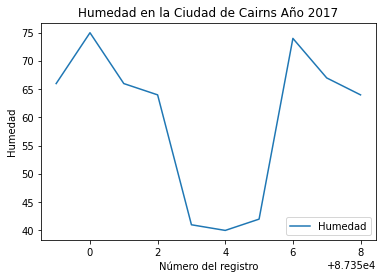

In [ ]:
#Gráfico de Humedad de Cairns en el año 2017
plt.plot(HumCC, label="Humedad")
plt.xlabel("Número del registro")
plt.ylabel("Humedad")
plt.legend(loc="lower right") 
plt.title('Humedad en la Ciudad de Cairns Año 2017')

**CoffsHarbour**

Se realizará un filtro de la humedad que hubo en la ciudad de CoffsHarbour solo en el año 2017, para posteriormente mostrar solo los 10 primeros que hubieron.

In [ ]:
HumCO = FiltroCO2016['Humidity3pm']
HumCO.head(10)

HumCCO = HumCO.head(10)
HumCCO

11338    56.0
11339    61.0
11340    87.0
11341    70.0
11342    86.0
11343    66.0
11344    53.0
11345    60.0
11346    62.0
11347    66.0
Name: Humidity3pm, dtype: float64

Text(0.5, 1.0, 'Humedad en la Ciudad de CoffsHarbour Año 2017')

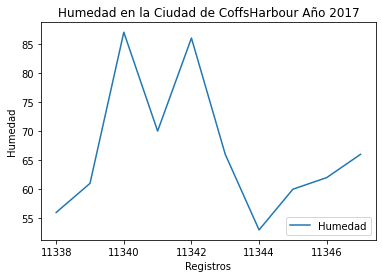

In [ ]:
plt.plot(HumCCO, label="Humedad")
plt.xlabel("Registros")
plt.ylabel("Humedad")
plt.legend(loc="lower right") 
plt.title('Humedad en la Ciudad de CoffsHarbour Año 2017')

**Darwin**

Se realizará un filtro de la humedad que hubo en la ciudad de Darwin solo en el año 2017, para posteriormente mostrar solo los 10 primeros que hubieron

In [ ]:
HumD = FiltroD2016['Humidity3pm']
HumD.head(10)

HumDD = HumD.head(10)
HumDD

138572    62.0
138573    71.0
138574    67.0
138575    62.0
138576    66.0
138577    55.0
138578    62.0
138579    62.0
138580    64.0
138581    65.0
Name: Humidity3pm, dtype: float64

Text(0.5, 1.0, 'Humedad en la Ciudad de Darwin Año 2017')

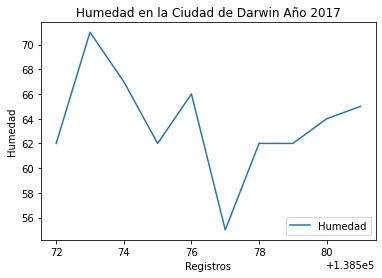

In [ ]:
plt.plot(HumDD, label="Humedad")
plt.xlabel("Registros")
plt.ylabel("Humedad")
plt.legend(loc="lower right") 
plt.title('Humedad en la Ciudad de Darwin Año 2017')

A continuación repetiremos el mismo método nombrado anteriormente para imprimir los primeros 10 valores de la temperatura en las 3 ciudades.

**Cairns**

In [ ]:
#Filtro Temperatura 9am en Cairns
FiltroTemp9C= FiltroC2016['Temp9am']
FiltroTemp9C.head(10)

Temp9CC = FiltroTemp9C.head(10)
Temp9CC

#Filtro Temperatura 3pm en Cairns
FiltroTemp3C = FiltroC2016['Temp3pm']
FiltroTemp3C.head(10)

Temp3C = FiltroTemp3C.head(10)
Temp3C

87349    28.1
87350    29.3
87351    29.1
87352    30.8
87353    32.6
87354    33.3
87355    33.4
87356    31.2
87357    31.1
87358    30.2
Name: Temp3pm, dtype: float64

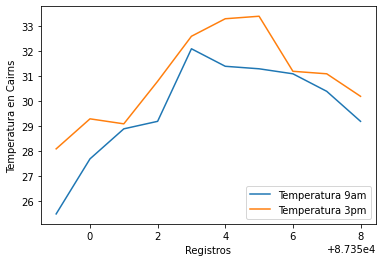

In [ ]:
plt.plot(Temp9CC, label="Temperatura 9am")
plt.plot(Temp3C, label="Temperatura 3pm")
plt.xlabel("Registros")
plt.ylabel("Temperatura en Cairns")
plt.legend(loc="lower right") 

**CoffsHarbour**

In [ ]:
#Filtro Temperatura 9am en CoffsHarbour
FiltroTemp9CO= FiltroCO2016['Temp9am']
FiltroTemp9CO.head(10)

Temp9CO= FiltroTemp9CO.head(10)
Temp9CO

#Filtro Temperatura 3pm en CoffsHarbour
FiltroTemp3CO = FiltroCO2016['Temp3pm']
FiltroTemp3CO.head(10)

Temp3CO = FiltroTemp3CO.head(10)
Temp3CO

11338    24.0
11339    23.0
11340    21.0
11341    25.8
11342    23.5
11343    25.1
11344    26.1
11345    24.6
11346    25.2
11347    26.1
Name: Temp3pm, dtype: float64

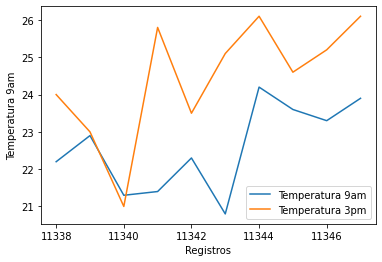

In [ ]:
plt.plot(Temp9CO, label="Temperatura 9am")
plt.plot(Temp3CO, label="Temperatura 3pm")
plt.xlabel("Registros")
plt.ylabel("Temperatura 9am")
plt.legend(loc="lower right") 

**Darwin**

In [ ]:
FiltroTemp9D= FiltroD2016['Temp9am']
FiltroTemp9D.head(10)

Temp9D= FiltroTemp9D.head(10)
Temp9D

#Filtro Temperatura 3pm en Darwin
FiltroTemp3D = FiltroD2016['Temp3pm']
FiltroTemp3D.head(10)

Temp3D = FiltroTemp3D.head(10)
Temp3D

138572    31.6
138573    31.1
138574    31.9
138575    32.6
138576    32.5
138577    32.8
138578    32.5
138579    31.7
138580    31.1
138581    31.6
Name: Temp3pm, dtype: float64

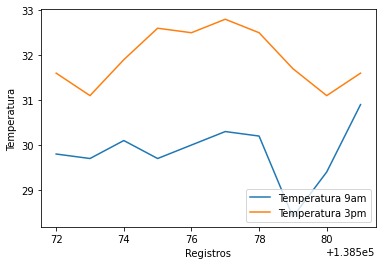

In [ ]:
plt.plot(Temp9D, label="Temperatura 9am")
plt.plot(Temp3D, label="Temperatura 3pm")
plt.xlabel("Registros")
plt.ylabel("Temperatura")
plt.legend(loc="lower right") 

##**Gráfico de Presión a las 9am y 3pm**

In [ ]:
Press9C= FiltroC2016['Pressure9am']
Press9C.head(10)

Press9Ca = Press9C.head(10)
Press9Ca

#Filtro Temperatura 3pm en Darwin
Press3C = FiltroC2016['Pressure3pm']
Press3C.head(10)

Press3Ca = Press3C.head(10)
Press3Ca

87349    1008.5
87350    1005.6
87351    1004.0
87352    1004.5
87353    1005.7
87354    1007.0
87355    1007.8
87356    1011.5
87357    1014.0
87358    1013.2
Name: Pressure3pm, dtype: float64

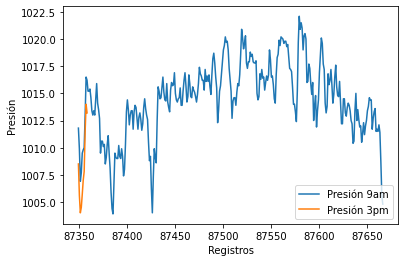

In [ ]:
plt.plot(Press9C, label="Presión 9am")
plt.plot(Press3Ca, label="Presión 3pm")
plt.xlabel("Registros")
plt.ylabel("Presión")
plt.legend(loc="lower right") 

In [ ]:
Press9CO= FiltroCO2016['Pressure9am']
Press9CO.head(10)

Press9COO = Press9CO.head(10)
Press9COO

#Filtro Temperatura 3pm en Darwin
Press3CF = FiltroCO2016['Pressure3pm']
Press3CF.head(10)

Press3F = Press3CF.head(10)
Press3F

11338    1013.2
11339    1010.2
11340    1012.5
11341    1011.6
11342    1009.0
11343    1004.4
11344    1011.2
11345    1018.5
11346    1019.5
11347    1018.7
Name: Pressure3pm, dtype: float64

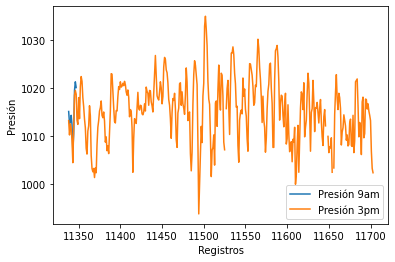

In [ ]:
plt.plot(Press9COO, label="Presión 9am")
plt.plot(Press3CF, label="Presión 3pm")
plt.xlabel("Registros")
plt.ylabel("Presión")
plt.legend(loc="lower right") 

In [ ]:
Press9D= FiltroD2016['Pressure9am']
Press9D.head(10)

Press9Da = Press9D.head(10)
Press9Da

#Filtro Temperatura 3pm en Darwin
Press3D = FiltroD2016['Pressure3pm']
Press3D.head(10)

Press3Da = Press3D.head(10)
Press3Da

138572    1009.0
138573    1008.0
138574    1008.6
138575    1010.2
138576    1010.1
138577    1010.6
138578    1010.2
138579    1010.9
138580    1011.2
138581    1011.3
Name: Pressure3pm, dtype: float64

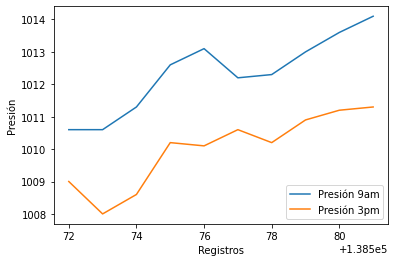

In [ ]:
plt.plot(Press9Da, label="Presión 9am")
plt.plot(Press3Da, label="Presión 3pm")
plt.xlabel("Registros")
plt.ylabel("Presión")
plt.legend(loc="lower right") 

# **Transformación y limpieza**

## **Eliminación de columnas**

In [ ]:
aus2 = aus
aus2

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


**Eliminación de las columnas con las que NO trabajaremos**

In [ ]:
aus2 = aus2.drop(columns  = 'WindGustDir')
aus2 = aus2.drop(columns = 'WindGustSpeed')
aus2 = aus2.drop(columns = 'WindSpeed9am')
aus2 = aus2.drop(columns = 'WindSpeed3pm')
aus2 = aus2.drop(columns = 'WindDir9am')
aus2 = aus2.drop(columns = 'WindDir3pm')
aus2 = aus2.drop(columns = 'RISK_MM')
aus2 = aus2.drop(columns = 'Pressure3pm')
aus2 = aus2.drop(columns = 'Pressure9am')
aus2

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,59.0,27.0,NaN,NaN,9.4,20.9,No,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,51.0,24.0,NaN,NaN,10.1,22.4,No,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,56.0,21.0,NaN,NaN,10.9,24.5,No,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,53.0,24.0,NaN,NaN,12.5,26.1,No,No


**Eliminación de las ciudades con las que NO trabajaremos**

In [ ]:
aus2.drop(aus2.loc[(aus2['Location'] !='Cairns') & (aus2['Location'] != 'Darwin') & (aus2['Location'] != 'CoffsHarbour')].index, inplace=True)
aus2

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8927,2009-01-01,CoffsHarbour,16.1,31.4,0.0,7.4,11.4,51.0,58.0,1.0,5.0,26.5,28.4,No,No
8928,2009-01-02,CoffsHarbour,22.8,24.7,0.0,8.0,0.2,68.0,67.0,7.0,7.0,23.4,24.4,No,Yes
8929,2009-01-03,CoffsHarbour,20.0,24.1,4.6,3.4,0.2,70.0,59.0,8.0,7.0,21.7,23.7,Yes,No
8930,2009-01-04,CoffsHarbour,14.8,25.0,0.8,3.0,12.6,62.0,45.0,5.0,2.0,22.5,24.8,No,No
8931,2009-01-05,CoffsHarbour,15.5,27.3,0.0,6.6,13.1,54.0,62.0,1.0,6.0,24.6,26.1,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139108,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,63.0,32.0,0.0,1.0,24.5,32.3,No,No
139109,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,56.0,28.0,7.0,0.0,24.8,32.0,No,No
139110,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,46.0,23.0,0.0,0.0,24.8,32.1,No,No
139111,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,62.0,58.0,1.0,1.0,24.8,29.2,No,No


**Eliminación de registros del año 2008 y 2017**

In [ ]:
aus2.drop(aus2.loc[(aus2['Date'] >= '2017-01-01')& (aus2['Date'] < '2009-01-01')].index, inplace=True)
aus2

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8927,2009-01-01,CoffsHarbour,16.1,31.4,0.0,7.4,11.4,51.0,58.0,1.0,5.0,26.5,28.4,No,No
8928,2009-01-02,CoffsHarbour,22.8,24.7,0.0,8.0,0.2,68.0,67.0,7.0,7.0,23.4,24.4,No,Yes
8929,2009-01-03,CoffsHarbour,20.0,24.1,4.6,3.4,0.2,70.0,59.0,8.0,7.0,21.7,23.7,Yes,No
8930,2009-01-04,CoffsHarbour,14.8,25.0,0.8,3.0,12.6,62.0,45.0,5.0,2.0,22.5,24.8,No,No
8931,2009-01-05,CoffsHarbour,15.5,27.3,0.0,6.6,13.1,54.0,62.0,1.0,6.0,24.6,26.1,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139108,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,63.0,32.0,0.0,1.0,24.5,32.3,No,No
139109,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,56.0,28.0,7.0,0.0,24.8,32.0,No,No
139110,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,46.0,23.0,0.0,0.0,24.8,32.1,No,No
139111,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,62.0,58.0,1.0,1.0,24.8,29.2,No,No


In [ ]:
aus2.duplicated().sum()      

0

In [ ]:
print("El total de missing values por columnas es: ")
aus2.isnull().sum()

El total de missing values por columnas es: 


Date               0
Location           0
MinTemp            4
MaxTemp            6
Rainfall          37
Evaporation     1567
Sunshine        1891
Humidity9am        8
Humidity3pm       14
Cloud9am         952
Cloud3pm         940
Temp9am            3
Temp3pm            6
RainToday         37
RainTomorrow       0
dtype: int64

In [ ]:
aus2.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


MinTemp        19.693307
MaxTemp        28.774899
Rainfall        5.300033
Evaporation     5.713177
Sunshine        7.938594
Humidity9am    68.750137
Humidity3pm    58.413203
Cloud9am        4.408508
Cloud3pm        4.400830
Temp9am        24.447777
Temp3pm        27.200964
dtype: float64

**Reemplazo Missing values por promedio de la columna**

In [ ]:
aus2['MinTemp'].fillna(aus2['MinTemp'].mean(), inplace=True)
aus2['MaxTemp'].fillna(aus2['MaxTemp'].mean(), inplace=True)
aus2['Temp9am'].fillna(aus2['Temp9am'].mean(), inplace=True)
aus2['Temp3pm'].fillna(aus2['Temp3pm'].mean(), inplace=True)
aus2['Humidity9am'].fillna(aus2['Humidity9am'].mean(), inplace=True)
aus2['Humidity3pm'].fillna(aus2['Humidity3pm'].mean(), inplace=True)
aus2['Evaporation'].fillna(aus2['Evaporation'].mean(), inplace=True)
aus2['Sunshine'].fillna(aus2['Sunshine'].mean(), inplace=True)
aus2['Cloud9am'].fillna(aus2['Cloud9am'].mean(), inplace=True)
aus2['Cloud3pm'].fillna(aus2['Cloud3pm'].mean(), inplace=True)



In [ ]:
aus['Evaporation']=aus2['Evaporation'].fillna(aus2['Evaporation'].mode()[0])

**Eliminación de los 37 nulos que contiene la columna Rainfall y RainToday**

In [ ]:
aus2.dropna(subset=['Rainfall', 'RainToday'], inplace=True)

In [ ]:
aus2["RainTomorrow"].replace({'No':0.0, 'Yes':1.0},inplace = True)
aus2.RainTomorrow = aus2.RainTomorrow.astype(int)
aus2["RainToday"].replace({'No':0.0, 'Yes':1.0},inplace = True)
aus2.RainToday = aus2.RainToday.astype(int)
aus2["Location"].replace({'Cairns':0, 'Darwin':1, 'CoffsHarbour':3},inplace = True)
aus2.Location = aus2.Location.astype(int)

In [ ]:
print("El total de missing values por columnas es: ")
aus2.isnull().sum()

El total de missing values por columnas es: 


Date            0
Location        0
MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64

In [ ]:
aus2.dtypes


Date             object
Location          int64
MinTemp         float64
MaxTemp         float64
Rainfall        float64
Evaporation     float64
Sunshine        float64
Humidity9am     float64
Humidity3pm     float64
Cloud9am        float64
Cloud3pm        float64
Temp9am         float64
Temp3pm         float64
RainToday         int64
RainTomorrow      int64
dtype: object

# **MODELAMIENTO**

A continuación, se hará el modelamiento de distintos modelos para ver cual es el que se adapta mejor a nuestra data y tiene mejores resultados en las métricas que calcularemos.

In [ ]:
#Librerías
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV

#Definición de columnas
columnas=['Location','Humidity3pm','Humidity9am','Evaporation','Temp9am','Temp3pm','RainToday']

#Separación de variables independientes y dependientes
x=aus2[columnas]
y=aus2['RainTomorrow']

#Separación de la data en entrenamiento y test
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.20)

## **Árbol de decisión**

In [ ]:
#Librería
from sklearn.tree import DecisionTreeClassifier

#Modelo
AC = DecisionTreeClassifier(max_depth = 6,  min_samples_leaf=2, random_state=1, max_leaf_nodes=128)

#Entrenamiento
AC.fit(x_train, y_train)

#Predicción
ac_pred = AC.predict(x_test)

#Metricas
print("El coeficiente de precisión es de: ", precision_score(y_test,ac_pred))
print("El coeficiente de sensibilidad es de: ", recall_score(y_test,ac_pred))
print("El coeficiente de f1 es de: ", f1_score(y_test, ac_pred))
print("El coeficiente de determinación es de: ", accuracy_score(y_test, ac_pred))

El coeficiente de precisión es de:  0.753968253968254
El coeficiente de sensibilidad es de:  0.5397727272727273
El coeficiente de f1 es de:  0.6291390728476821
El coeficiente de determinación es de:  0.8153846153846154


## **Bagging**

In [ ]:
#Libería
from sklearn.ensemble import BaggingClassifier

#Modelo
ba = BaggingClassifier(base_estimator=AC, n_estimators=100, random_state=7)

#Entrenamiento
ba.fit(x_train, y_train)

#Predicción
ba_pred = ba.predict(x_test)

#Metricas
print("El coeficiente de precisión es de: ", precision_score(y_test,ba_pred))
print("El coeficiente de sensibilidad es de: ", recall_score(y_test,ba_pred))
print("El coeficiente de f1 es de: ", f1_score(y_test, ba_pred))
print("El coeficiente de determinación es de: ", accuracy_score(y_test, ba_pred))

El coeficiente de precisión es de:  0.75
El coeficiente de sensibilidad es de:  0.5454545454545454
El coeficiente de f1 es de:  0.631578947368421
El coeficiente de determinación es de:  0.8153846153846154


0.75
0.5454545454545454
0.631578947368421
0.8153846153846154


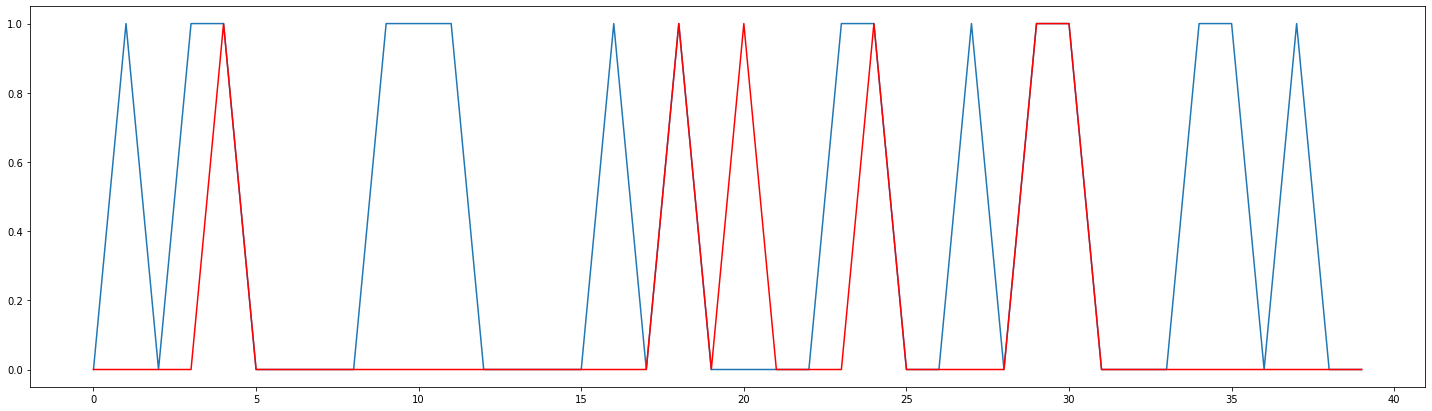

In [ ]:
#Creación de gráfico
bagg = ba_pred

print(precision_score(y_test, bagg))
print(recall_score(y_test, bagg))
print(f1_score(y_test, bagg))
print(accuracy_score(y_test, bagg))

plt.subplots(figsize=(25,7))
plt.plot(np.array(y_test[:40]))
plt.plot(bagg [:40], 'r')

## **KNN model**

In [ ]:
#Librería
from sklearn.neighbors import KNeighborsClassifier

#Modelo
knn= KNeighborsClassifier(n_neighbors=50)

#Entrenamiento
knn.fit(x_train,y_train)

#Predicción
knn_pred=knn.predict(x_test)

#Metricas
print("El coeficiente de precisión es de: ", precision_score(y_test,knn_pred))
print("El coeficiente de sensibilidad es de: ", recall_score(y_test,knn_pred))
print("El coeficiente de f1 es de: ", f1_score(y_test, knn_pred))
print("El coeficiente de determinación es de: ", accuracy_score(y_test,knn_pred))

El coeficiente de precisión es de:  0.7466307277628033
El coeficiente de sensibilidad es de:  0.5246212121212122
El coeficiente de f1 es de:  0.6162402669632926
El coeficiente de determinación es de:  0.8104395604395604


0.7466307277628033
0.5246212121212122
0.6162402669632926
0.8104395604395604


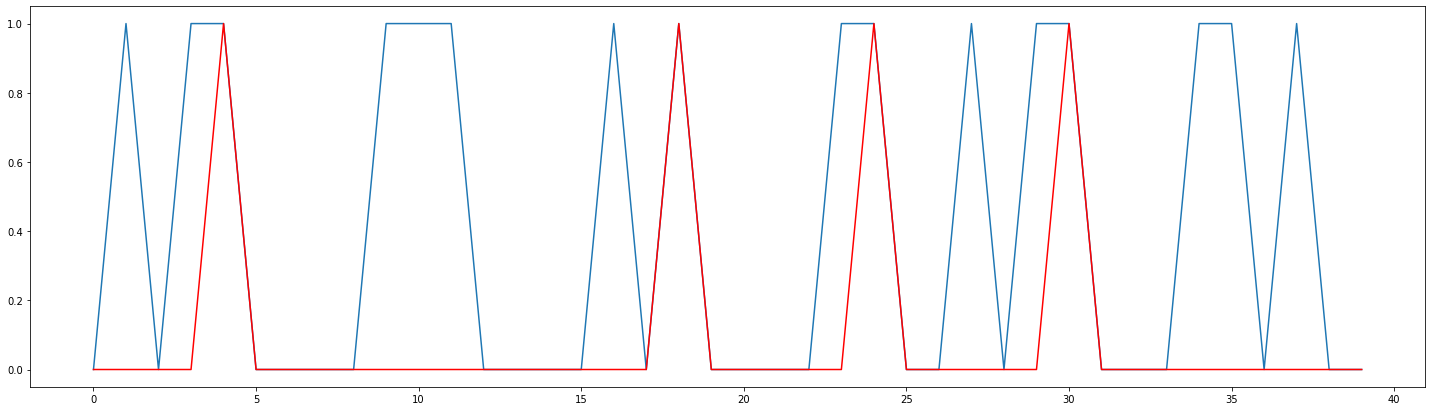

In [ ]:
#Creación de gráfico
mknn = knn_pred

print(precision_score(y_test, mknn))
print(recall_score(y_test, mknn))
print(f1_score(y_test, mknn))
print(accuracy_score(y_test, mknn))

plt.subplots(figsize=(25,7))
plt.plot(np.array(y_test[:40]))
plt.plot(mknn [:40], 'r')

## **Random Forest Classifier**

In [ ]:
#Librería
from sklearn.ensemble import RandomForestClassifier

#Modelo
ran = RandomForestClassifier(max_depth=7, n_estimators=17, min_samples_leaf=2, random_state=1, max_leaf_nodes=256)

#Entrenamiento
ran.fit(x_train,y_train)

#Predicción
ran_pred = ran.predict(x_test)

#Métricas
print("El coeficiente de precisión es de: ", precision_score(y_test,ran_pred))
print("El coeficiente de sensibilidad es de: ", recall_score(y_test,ran_pred))
print("El coeficiente de f1 es de: ", f1_score(y_test, ran_pred))
print("El coeficiente de determinación es de: ", accuracy_score(y_test,ran_pred))

El coeficiente de precisión es de:  0.7608142493638677
El coeficiente de sensibilidad es de:  0.5662878787878788
El coeficiente de f1 es de:  0.6492942453854506
El coeficiente de determinación es de:  0.8225274725274725


0.7608142493638677
0.5662878787878788
0.6492942453854506
0.8225274725274725


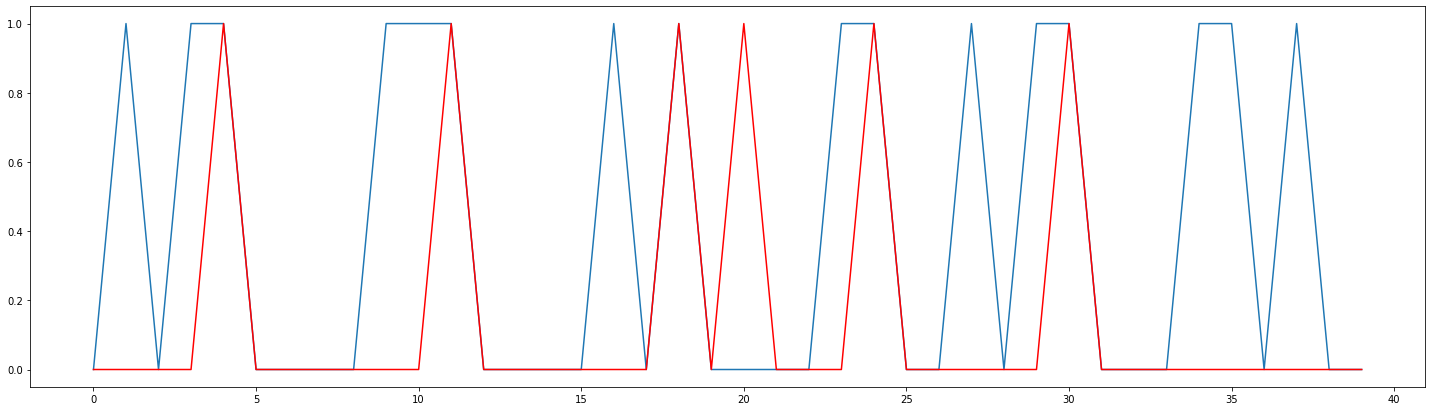

In [ ]:
#Creación de gráfico
rfc = ran_pred

print(precision_score(y_test, rfc))
print(recall_score(y_test, rfc))
print(f1_score(y_test, rfc))
print(accuracy_score(y_test, rfc))

plt.subplots(figsize=(25,7))
plt.plot(np.array(y_test[:40]))
plt.plot(rfc [:40], 'r')

## **AUC-ROC**

A continuación, realizaremos un AUC y trazaremos la linea ROc para medir los aciertos en la predicción.

In [ ]:
#Librerías
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ar_auc = roc_auc_score(y_test, ac_pred)
bg_auc = roc_auc_score(y_test, ba_pred)
knn_auc = roc_auc_score(y_test, knn_pred)
rfc_auc = roc_auc_score(y_test, ran_pred)

print('Árbol de clasificación: ',ar_auc)
print('Bagging: ',bg_auc)
print('KNN Neighbors: ',knn_auc)
print('Random Forest Classifier: ',rfc_auc)


Árbol de clasificación:  0.7338956515620603
Bagging:  0.735575569940895
KNN Neighbors:  0.7259328970822779
Random Forest Classifier:  0.7467662304156113


In [ ]:
def plot_roc_curve(fper, tper, nombre):
    plt.plot(fper, tper, color='red', label=nombre)
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

A continuación realizaremos los graficos para trazar la linea ROC con cada uno de los modelos.

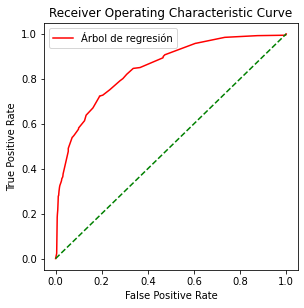

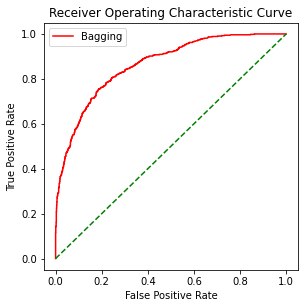

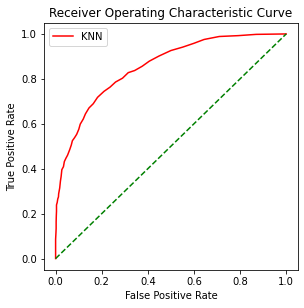

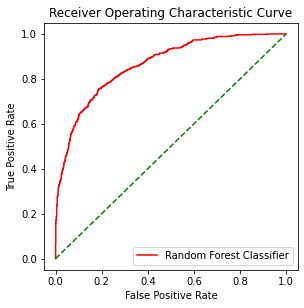

In [ ]:
#Grafico Árbol de clasificación
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
probabilidadAC = AC.predict_proba(x_test)
probabilidadAC1 = probabilidadAC[:,1]
probabilidadAC1
fpr, tpr, thereshold = roc_curve(y_test,probabilidadAC1)
plot_roc_curve(fpr,tpr, 'Árbol de regresión')

#Grafico Bagging
plt.figure(figsize=(10,10))
plt.subplot(2,2,3)
probabilidadB = ba.predict_proba(x_test)
probabilidadB1 = probabilidadB[:,1]
probabilidadB1
fpr, tpr, thereshold = roc_curve(y_test,probabilidadB1)
plot_roc_curve(fpr,tpr, 'Bagging')

#Grafico KNN
plt.figure(figsize=(10,10))
plt.subplot(2,2,3)
probabilidadKNN = knn.predict_proba(x_test)
probabilidadKNN1 = probabilidadKNN[:,1]
probabilidadKNN1
fpr, tpr, thereshold = roc_curve(y_test,probabilidadKNN1)
plot_roc_curve(fpr,tpr, "KNN")

#Grafico Random Forest Classifier
plt.figure(figsize=(10,10))
plt.subplot(2,2,4)
probabilidadR = ran.predict_proba(x_test)
probabilidadR1 = probabilidadR[:,1]
probabilidadR1
fpr, tpr, thereshold = roc_curve(y_test,probabilidadR1)
plot_roc_curve(fpr,tpr, 'Random Forest Classifier')


Podemos ver que todos los modelos tienen una curvatura similar, esto quiere decir que tienen una capacidad similar de sensibilidad y determinación, con la diferencia en pequeñas curvaturas dentro de la linea, por lo que predicen aproximadamente un 25% de falsos positivos y negativos. 

In [ ]:
#@title Modelo de predicción
#@markdown Recuerda que en Location, Cairns es 0, Darwin es 1 y CoffsHarbour es 2

Location =  1#@param {type:"integer"}
Humidity3pm =  90.0#@param {type:"number"}
Humidity9am = 90.0#@param {type:"number"}
Evaporation = 10.5#@param {type:"number"}
Temp9am = 50.5#@param {type:"number"}
Temp3pm = 32.3#@param {type:"number"}
RainToday =  1#@param {type:"integer"}


In [ ]:
pred_y = ran.predict([[Location, Humidity3pm, Humidity9am, Evaporation, Temp9am, Temp3pm, RainToday]])
print('Según la predicción, mañana en la ciudad que usted escogió si sale un 1 lloverá y si es un 0 no lloverá, el resultado es: ' + str(pred_y)) 

Según la predicción, mañana en la ciudad que usted escogió si sale un 1 lloverá y si es un 0 no lloverá, el resultado es: [1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


## Prediccion


In [ ]:
!pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import joblib

joblib.dump(ran, 'RandomForest_joblib')

['RandomForest_joblib']

In [ ]:
!python --version

Python 3.7.13


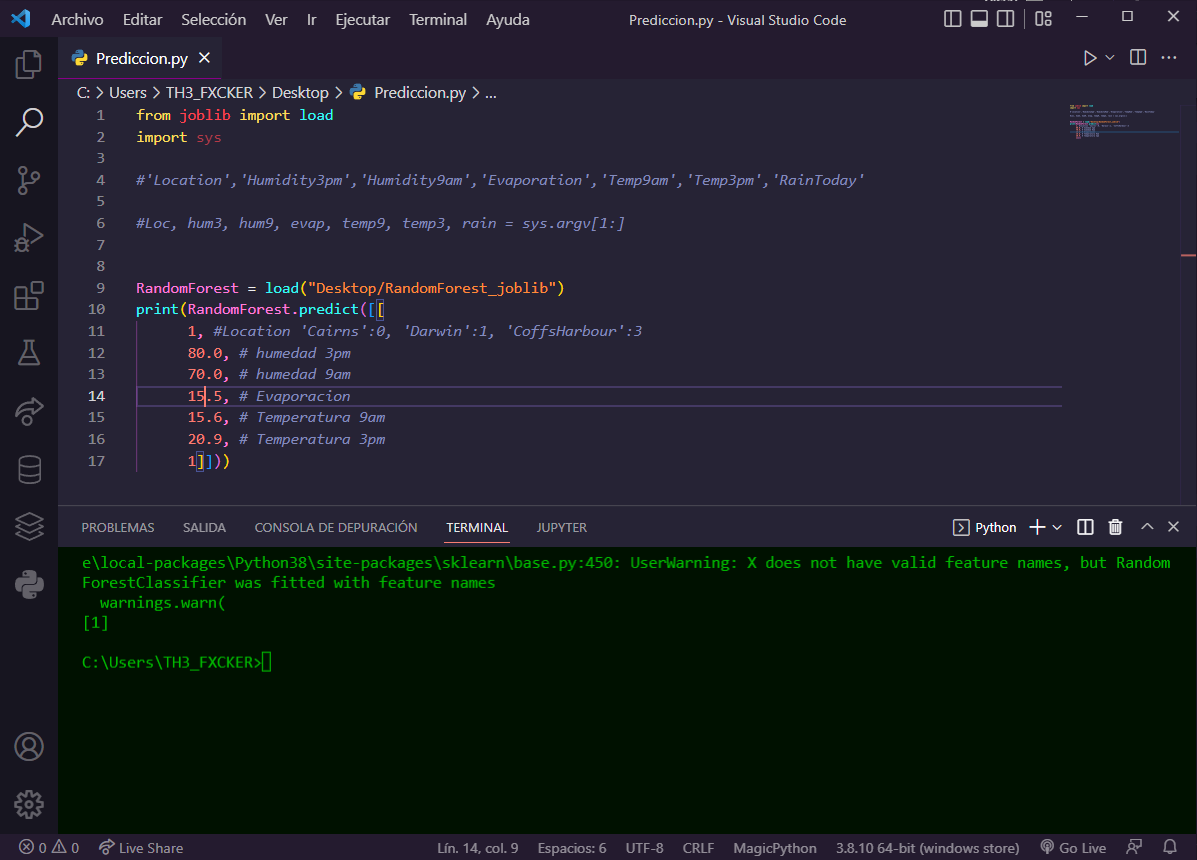

**Conclusión**

Como conclusión, después de realizar distintos modelos y quedarnos con los mejores cuatro, deducimos que el mejor modelo para nuestro objetivo es RandomForestClassifier, ya que, a la horade medir las métricas este fue el modelo que tuvo los mejores resultados. Obtuvo mejor resultados en precisión a la hora de realizar tareas de clasificación con un 76,08%, también obtuvo un mejor resultado en sensibilidad que es mejor conocida como recall, lo cual determina la cantidad de datos que el modelo logra identificar con un 56,62%, también obtuvo los mejores resultados con la métrica 'f1' que es la combinación de las dos métricas anteriores con igual importancia con un 64,92% y finalmente con la acuraccy que es la exactitud con porcentaje que el modelo ha acertado. Por esto elegimos el RandomForestClassifier como el modelo ganador aunque las métricas no han tenido mucha diferencia con los otros, por lo que creemos que ha medida que se vaya entrenando el modelo puede obtener aún mejores resultados. Por otra parte, también gana en cuanto a AUC y ROC ya que obtuvo un mejor resultado con un 74%, obteniendo menos resultados falsos entre falsos negativos y positivos. Por lo cual este es el modelo que mejor se adapta a nuestra data.